<a href="https://colab.research.google.com/github/Souad5/Facebook-Login-Page/blob/main/Md_Souad_Al_Kabir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))
print(df.head(10))


Saving train.csv to train (1).csv
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            M

In [5]:
import pandas as pd
import numpy as np

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop('Cabin', axis=1, inplace=True)
df.drop_duplicates(inplace=True)

def age_group(age):
    if age < 18:
        return 'Child'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'

df['AgeGroup'] = df['Age'].apply(age_group)

print(df.isnull().sum())
print(df.head(10))

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
AgeGroup       0
dtype: int64
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4

<ipython-input-5-1a90483e1b7a>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-5-1a90483e1b7a>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

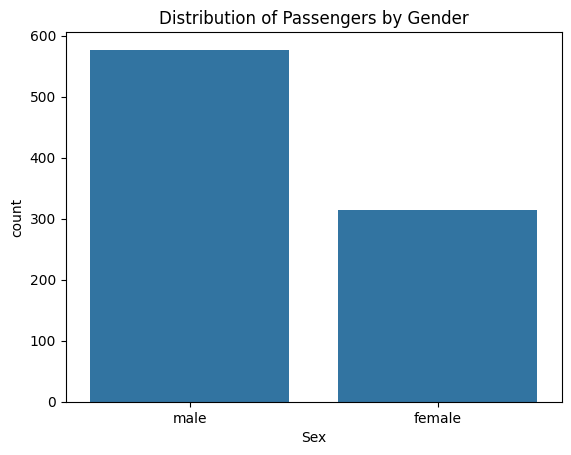

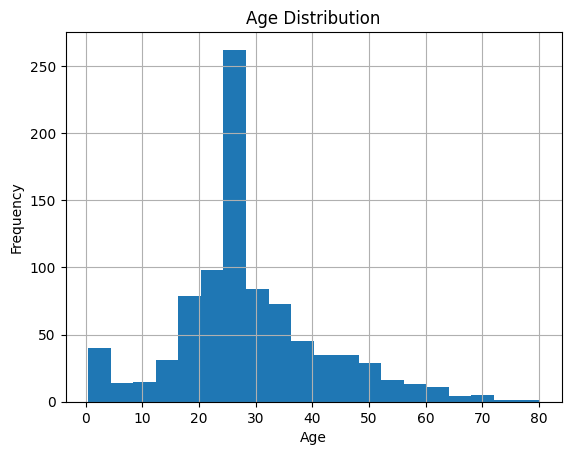

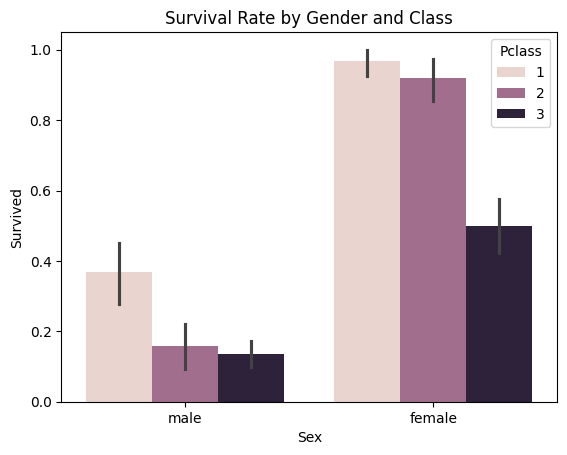

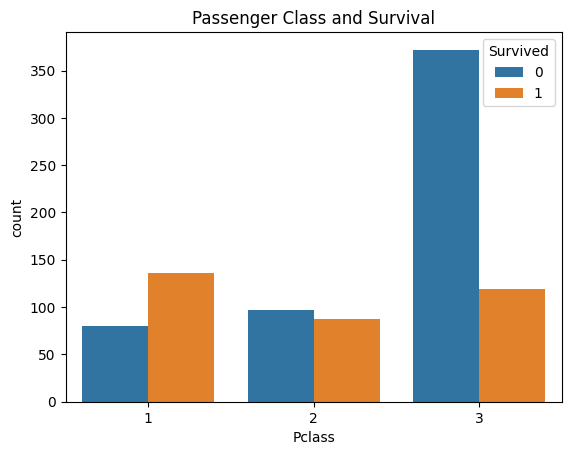

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

summary = df.describe()

sns.countplot(x='Sex', data=df)
plt.title('Distribution of Passengers by Gender')
plt.show()

df['Age'].hist(bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

sns.barplot(x='Sex', y='Survived', hue='Pclass', data=df)
plt.title('Survival Rate by Gender and Class')
plt.show()

sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Passenger Class and Survival')
plt.show()

In [7]:
from scipy import stats

fare_mean = df['Fare'].mean()
fare_median = df['Fare'].median()
fare_mode = df['Fare'].mode()[0]

age_mean = df['Age'].mean()
age_median = df['Age'].median()
age_mode = df['Age'].mode()[0]

male_survived = df[df['Sex'] == 'male']['Survived']
female_survived = df[df['Sex'] == 'female']['Survived']
t_stat, p_value = stats.ttest_ind(male_survived, female_survived)

print(f"Fare - Mean: {fare_mean}, Median: {fare_median}, Mode: {fare_mode}")
print(f"Age - Mean: {age_mean}, Median: {age_median}, Mode: {age_mode}")
print(f"T-test: t-statistic = {t_stat}, p-value = {p_value}")


Fare - Mean: 32.204207968574636, Median: 14.4542, Mode: 8.05
Age - Mean: 29.36158249158249, Median: 28.0, Mode: 28.0
T-test: t-statistic = -19.297816550123354, p-value = 1.4060661308802594e-69


### Data Cleaning Rationale:

1. **Handling Missing Values**:
   - **Age**: Filled with median to avoid skewing from outliers.
   - **Embarked**: Filled with mode (most common value) for categorical data.
   - **Cabin**: Dropped due to excessive missing data.

2. **Duplicates**: Removed to maintain data integrity.

3. **Age Grouping**: Created `AgeGroup` to categorize passengers into `Child`, `Adult`, and `Senior` for better survival analysis.

---

### Visualization and Statistical Findings:

1. **Summary Statistics**:
   - Average age: ~30 years, average fare: ~32 units. Fare distribution was highly skewed.

2. **Gender Distribution**:
   - More males than females on board. Gender likely impacted survival rates.

3. **Age Distribution**:
   - Majority were adults; fewer children and seniors.

4. **Survival by Gender and Class**:
   - Females and first-class passengers had a much higher survival rate than males and lower-class passengers.

5. **Class and Survival**:
   - First-class passengers had a significantly higher survival rate than those in second or third class.

6. **Statistical Analysis**:
   - Significant difference in survival between males and females (p-value from t-test). Fares were highly skewed, and age distribution was near normal.

These findings show that gender, class, and age significantly impacted survival rates on the Titanic.